<a href="https://colab.research.google.com/github/munakandel/CODSOFT/blob/main/codsoft_%F0%9D%92%95%F0%9D%92%82%F0%9D%92%94%F0%9D%92%8C%F0%9D%92%8F%F0%9D%92%901.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [23]:
encoding = 'ISO-8859-1'
raw_url = 'https://raw.githubusercontent.com/munakandel/CODSOFT/main/IRIS.csv'
df = pd.read_csv(raw_url, encoding=encoding)
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df['species'], categories=pd. factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [28]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

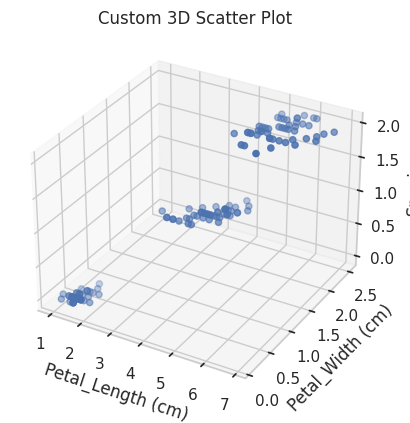

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['petal_length'], df['petal_width'], df['species'])
ax.set_xlabel('Petal_Length (cm)')
ax.set_ylabel('Petal_Width (cm)')
ax.set_zlabel('Species')
plt.title('Custom 3D Scatter Plot')
plt.show()

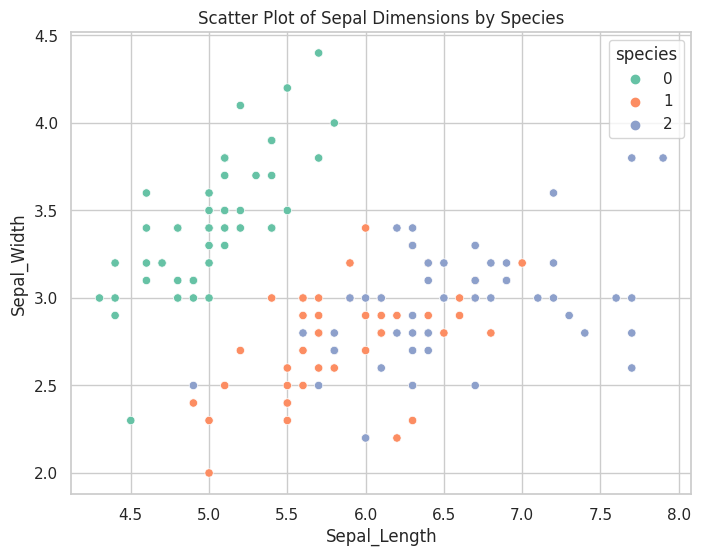

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', palette='Set2')
scatter_plot.set(xlabel='Sepal_Length', ylabel='Sepal_Width')
plt.title('Scatter Plot of Sepal Dimensions by Species')
plt.show()

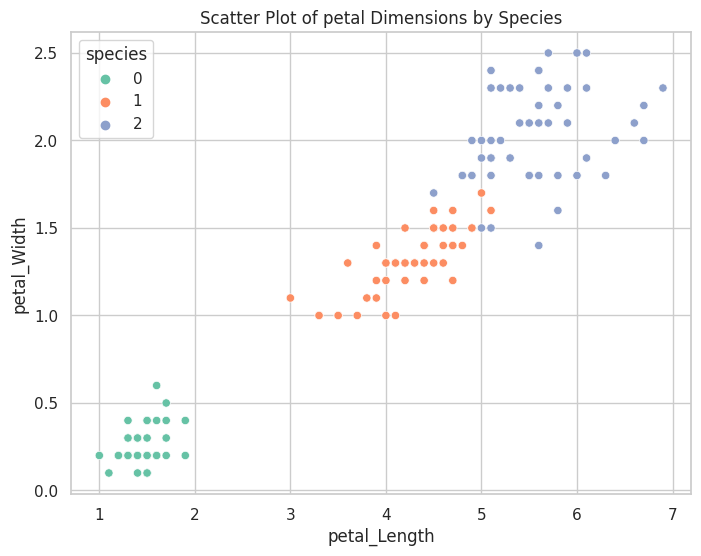

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', palette='Set2')
scatter_plot.set(xlabel='petal_Length', ylabel='petal_Width')
plt.title('Scatter Plot of petal Dimensions by Species')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

The optimal number of clusters is: 9


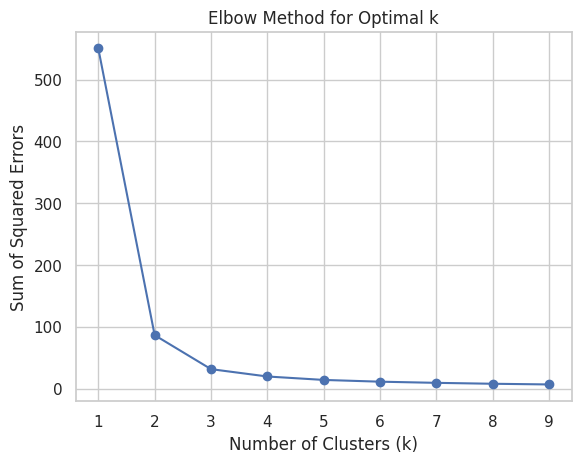

In [32]:
k_range = range(1, 10)
sse_values = []
for k_value in k_range:
    kmeans = KMeans(n_clusters=k_value)
    kmeans.fit(df[['petal_length', 'petal_width']])
    sse_values.append(kmeans.inertia_)
optimal_clusters = np.argmin(sse_values) + 1
print(f"The optimal number of clusters is: {optimal_clusters}")
plt.plot(k_range, sse_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method for Optimal k')
plt.show()


In [33]:
km=KMeans (n_clusters=3, random_state = 0)
y_predicted = km.fit_predict(df[['petal_length', 'petal_width']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [34]:
df[ 'cluster'] = y_predicted
df.head (5)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


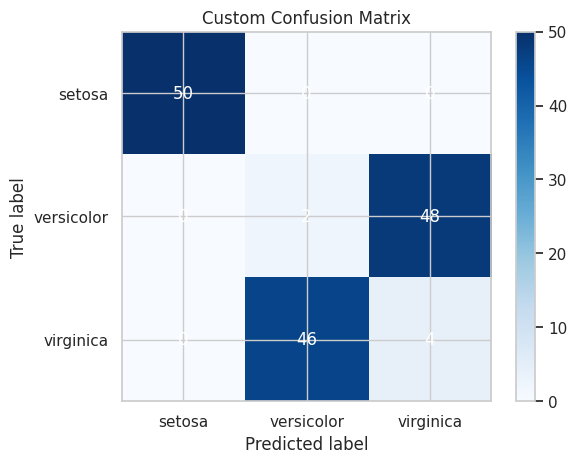

In [35]:
class_labels = ['setosa', 'versicolor', 'virginica']
true_labels = df['species']
predicted_labels = df['cluster']
cm = confusion_matrix(true_labels, predicted_labels)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Custom Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [36]:
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
target = df['species']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [37]:
X_train, X_test, y_train, y_test

(     sepal_length  sepal_width  petal_length  petal_width
 22            4.6          3.6           1.0          0.2
 15            5.7          4.4           1.5          0.4
 65            6.7          3.1           4.4          1.4
 11            4.8          3.4           1.6          0.2
 42            4.4          3.2           1.3          0.2
 ..            ...          ...           ...          ...
 71            6.1          2.8           4.0          1.3
 106           4.9          2.5           4.5          1.7
 14            5.8          4.0           1.2          0.2
 92            5.8          2.6           4.0          1.2
 102           7.1          3.0           5.9          2.1
 
 [120 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 73            6.1          2.8           4.7          1.2
 18            5.7          3.8           1.7          0.3
 118           7.7          2.6           6.9          2.3
 78            6.0          2

In [38]:
custom_scaler = StandardScaler()
X_train_scaled_custom = custom_scaler.fit_transform(X_train)
X_test_scaled_custom = custom_scaler.transform(X_test)
print("Scaled Training Data:")
print(X_train_scaled_custom)
print("\nScaled Test Data:")
print(X_test_scaled_custom)

Scaled Training Data:
[[-1.47393679  1.22037928 -1.5639872  -1.30948358]
 [-0.13307079  3.02001693 -1.27728011 -1.04292204]
 [ 1.08589829  0.09560575  0.38562104  0.28988568]
 [-1.23014297  0.77046987 -1.21993869 -1.30948358]
 [-1.7177306   0.32056046 -1.39196294 -1.30948358]
 [ 0.59831066 -1.25412249  0.72966956  0.95628954]
 [ 0.72020757  0.32056046  0.44296246  0.42316645]
 [-0.74255534  0.99542457 -1.27728011 -1.30948358]
 [-0.98634915  1.22037928 -1.33462153 -1.30948358]
 [-0.74255534  2.34515281 -1.27728011 -1.44276436]
 [-0.01117388 -0.80421307  0.78701097  0.95628954]
 [ 0.23261993  0.77046987  0.44296246  0.55644722]
 [ 1.08589829  0.09560575  0.5576453   0.42316645]
 [-0.49876152  1.8952434  -1.39196294 -1.04292204]
 [-0.49876152  1.44533399 -1.27728011 -1.30948358]
 [-0.37686461 -1.47907719 -0.01576889 -0.24323741]
 [ 0.59831066 -0.57925837  0.78701097  0.42316645]
 [ 0.72020757  0.09560575  1.01637665  0.82300877]
 [ 0.96400139 -0.12934896  0.38562104  0.28988568]
 [ 1.6953

In [39]:
knn=KNeighborsClassifier (n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

In [40]:
knn.fit(X_train_scaled_custom, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
y_pred=knn.predict (X_test_scaled_custom)

In [42]:
unique_species_names = df['species'].unique().astype(str).tolist()
classification_report_custom = classification_report(y_test, y_pred, target_names=unique_species_names)
print("Custom Classification Report:")
print(classification_report_custom)

Custom Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

